In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sentences = [
    "I study natural ianguage processing",
    "I study deep learning",
    "Language models capture meaning",
    "I went to the bank to deposit money",
    "The river bank was full of beautiful flowers"
]

In [11]:
tokenized_sentences = [s.lower().split() for s in sentence]

In [12]:
from gensim.models import Word2Vec

In [14]:
w2v_model = Word2Vec(tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4)

In [18]:
# 단어 벡터 추출
words = ["language", "models", "bank", "money", "flowers"]
w2v_vectors = [w2v_model.wv[w] for w in words]

In [19]:
w2v_vectors

[array([ 0.00548122, -0.0167151 ,  0.01571156,  0.01707681, -0.01916298,
         0.00489016,  0.0198126 , -0.01532891, -0.01393697, -0.01547575,
         0.01679223, -0.00136641,  0.0182906 , -0.01631531,  0.00749013,
         0.00527337,  0.00148906,  0.0046571 , -0.01494301, -0.01871782,
         0.00470971,  0.01229644,  0.01597838,  0.01146936, -0.00155111,
         0.01661263, -0.01867324,  0.00681483,  0.00053146,  0.00771655,
         0.01477913, -0.01345451,  0.01116761, -0.01904584, -0.00160738,
        -0.01737539, -0.01019285,  0.01858084, -0.00371374,  0.00583357,
         0.01814583,  0.01787558, -0.01642076, -0.00602486,  0.01977506,
         0.0102125 , -0.00317269, -0.01738477,  0.00592264, -0.01335211],
       dtype=float32),
 array([ 1.62600223e-02, -8.91000312e-03, -2.13690009e-03,  2.01524817e-03,
        -3.77016317e-04,  2.29452597e-03,  1.22289937e-02, -3.78567238e-05,
        -6.49305061e-03, -3.02319368e-03,  1.17943464e-02,  3.02665122e-03,
        -1.4460776

In [21]:
# 2D 시각화를 위한 차원 축소 (t-SNE)
from sklearn.manifold import TSNE
import numpy as np

In [25]:
# word2Vec 시각화 tsne 입력 형태인 array로 변형
X_w2v_vectors = np.array(w2v_vectors) #(n_samples, n_features
n_samples = X_w2v_vectors.shape[0]
perplexity = max(1, min(30,n_samples - 1))

In [27]:
# Word2Vec 시각화 tsne 학습
tsne = TSNE(n_components=2, random_state=42, perplexity = perplexity)
w2v_2d = tsne.fit_transform(X_w2v_vectors)

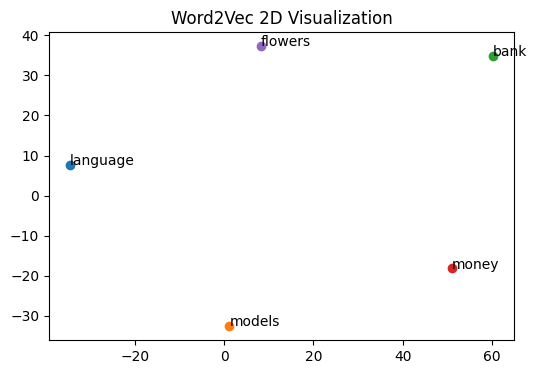

In [32]:
plt.figure(figsize = (6,4))

for i, word in enumerate(words):
    plt.scatter(w2v_2d[i,0], w2v_2d[i,1])
    plt.text(w2v_2d[i,0]+0.01, w2v_2d[i,1]+0.01, word)

plt.title("Word2Vec 2D Visualization")
plt.show()

In [33]:
#Glove
import gensim.downloader as api

In [35]:
glove_model = api.load("glove-wiki-gigaword-50")

[=================---------------------------------] 35.5% 23.4/66.0MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 66.0/66.0MB downloaded


In [36]:
glove_vectors = [glove_model[w] for w in words]

In [38]:
# 시각화 tsne 입력 형태인 array로 변형
X_glove_vectors = np.array(glove_vectors)
n_samples = X_glove_vectors.shape[0]
perplexoty = max(i, min(30,n_samples - 1))

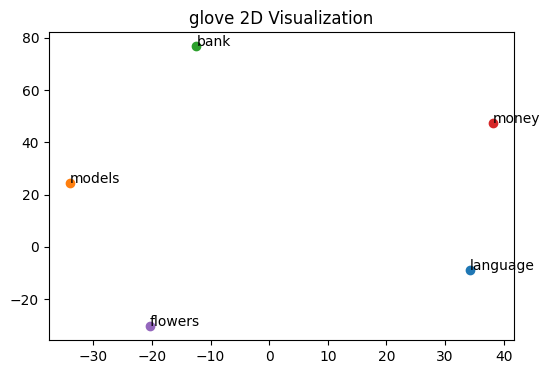

In [39]:
# Glove 시각화
glove_2d = TSNE(n_components=2, random_state=42, perplexity=perplexity).fit_transform(X_glove_vectors)

plt.figure(figsize=(6,4))
for i, word in enumerate(words):
    plt.scatter(glove_2d[i,0], glove_2d[i,1])
    plt.text(glove_2d[i,0]+0.01, glove_2d[i,1]+0.01, word)
plt.title("glove 2D Visualization")
plt.show()

In [40]:
#BERT
from sentence_transformers import SentenceTransformer
import numpy as np

In [41]:
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [42]:
# 단어 수준 확인을 위해 문장 단위로 추출 후 첫 단어 임베딩 사용
bert_embeddings = bert_model.encode(sentences)

In [46]:
# 시각화 tsne 입력 형태인 array로 변형
X_bert_vectors = np.array(bert_embeddings) #(n_samples, n_features)
n_samples = X_bert_vertors.shape[0]
perplexity = max(1, min(30, n_samples - 1))

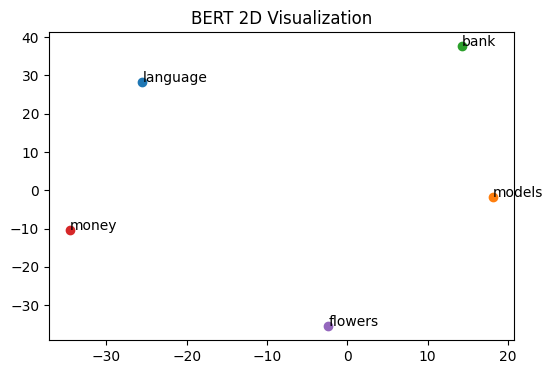

In [48]:
bert_2d = TSNE(n_components=2, random_state=42, perplexity = perplexity).fit_transform(X_bert_vectors)

plt.figure(figsize=(6,4))
bert_words = ["language", "models", "bank", "money", "flowers"]
for i, word in enumerate(bert_words):
    plt.scatter(bert_2d[i,0], bert_2d[i,1])
    plt.text(bert_2d[i,0]+0.01, bert_2d[i,1]+0.01, word)
plt.title("BERT 2D Visualization")
plt.show()